<a href="https://colab.research.google.com/github/jonnythebard/tf2_workbook/blob/master/ann_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install Tensorflow
!pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
# load in the data
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0 # normalize values to 0~1
print("X_train.shape:", X_train.shape)

X_train.shape: (60000, 28, 28)


In [0]:
# build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="softmax"),
])

In [0]:
# compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [0]:
# train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2960 - accuracy: 0.9143 - val_loss: 0.1361 - val_accuracy: 0.9596
Epoch 2/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.1446 - accuracy: 0.9568 - val_loss: 0.1052 - val_accuracy: 0.9689
Epoch 3/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.1065 - accuracy: 0.9678 - val_loss: 0.0892 - val_accuracy: 0.9728
Epoch 4/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0886 - accuracy: 0.9729 - val_loss: 0.0790 - val_accuracy: 0.9758
Epoch 5/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0739 - accuracy: 0.9773 - val_loss: 0.0697 - val_accuracy: 0.9784
Epoch 6/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0656 - accuracy: 0.9792 - val_loss: 0.0649 - val_accuracy: 0.9805
Epoch 7/10
60000/60000 [===========================

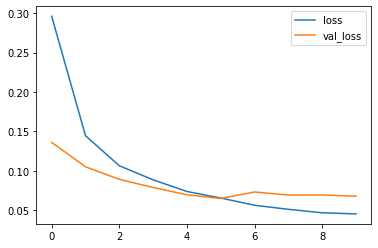

In [0]:
# plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

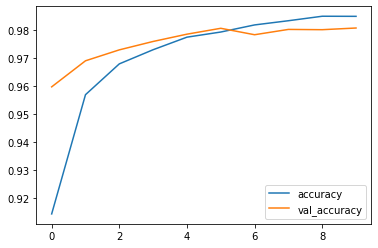

In [0]:
# plot accuracy per iteration
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()

In [0]:
# evaluate the model
print(model.evaluate(X_test, y_test))

10000/10000 [==============================] - 0s 39us/sample - loss: 0.0679 - accuracy: 0.9806
[0.06785037923682248, 0.9806]
